# 18 - Effets Hétérogènes des Traitements et Personnalisation

## Des Prédictions à l'Inférence Causale

Dans le dernier chapitre, nous avons brièvement abordé les modèles de Machine Learning. Les modèles de ML sont des outils pour ce que j'ai appelé les prédictions ou, plus techniquement, l'estimation de la fonction d'espérance conditionnelle $E[Y|X]$. En d'autres termes, le ML est extrêmement utile lorsque vous voulez faire correspondre une entrée connue $X$ (comme une phrase en anglais, les ventes de ce mois-ci, des images de scanners cérébraux) à une sortie initialement inconnue mais bien définie $Y$ (comme des phrases en japonais, les ventes du mois prochain ou des diagnostics de cancer). Donc, si le ML concerne les prédictions, ou l'estimation de $E[Y|X]$, pour qu'il soit utile, vous devez formuler le problème que vous voulez résoudre avec le ML comme un problème de prédiction, un problème où estimer $E[Y|X]$ est la clé. Nous avons traversé un tel exemple dans le dernier chapitre. Là, nous devions prédire la rentabilité des clients à partir de caractéristiques spécifiques aux clients : $E[NetValue|Age, Income, Region]$. Cette information était très utile, car elle nous permettait de concentrer nos efforts sur l'engagement avec des clients rentables, tout en évitant de faire des affaires avec des clients non rentables. Ici, bien prédire la rentabilité est essentiel.

Notez qu'il s'agit d'une approche passive de l'estimation dans le sens où vous vous éloignez du processus de génération des données. Dans notre exemple, nous avons supposé que la rentabilité des clients, `NetValue`, était donnée. Tout ce que nous avions à faire était de l'estimer. En d'autres termes, nous avons supposé qu'il n'y avait rien que nous puissions faire pour la rentabilité des clients autre que de la prédire. Nous ne pouvions ni l'augmenter, ni la diminuer. Mais ce n'est pas toujours vrai. En fait, souvent, les entreprises ont des leviers qu'elles peuvent utiliser pour augmenter la rentabilité des clients. Ces leviers peuvent aller d'un service client de qualité ou moins cher, à des réductions, des prix ou du marketing. Dans l'industrie, il est souvent le cas que nous sommes insérés dans le processus de génération des données. Nous pouvons l'affecter. Ainsi, en tant que data scientists travaillant dans l'industrie, nous devons souvent répondre à la question de savoir quelle est la meilleure action à entreprendre ou quelle intervention réaliser pour optimiser une certaine mesure commerciale, généralement la rentabilité ou une autre mesure intermédiaire comme la conversion, les coûts ou les ventes.

Dans ce monde, où nous ne sommes pas des observateurs passifs, estimer $E[Y|X]$ n'est pas le tableau complet. C'est ici que l'inférence causale entre en jeu. Nous devons ajouter un autre élément à notre fonction d'espérance conditionnelle. Cet élément est précisément ce qui modèle notre participation au processus de génération des données. Cet élément est le traitement :

$$
E[Y|X, T]
$$

Nous devons maintenant faire la distinction entre le contexte ou les caractéristiques exogènes $X$ et les traitements $T$. Les deux impactent le résultat $Y$, mais tandis que nous n'avons aucun contrôle sur $X$, nous pouvons décider quelle valeur $T$ prendra ou du moins intervenir dessus. Pour donner un exemple concret, $Y$ pourrait être les ventes en une journée, $X$ pourrait être des caractéristiques contextuelles que vous ne pouvez pas contrôler, mais qui vous donnent des informations sur les ventes, comme les ventes moyennes des jours précédents, et $T$ est la variable de traitement sur laquelle vous pouvez intervenir pour augmenter les ventes, comme le prix, les niveaux de stock des articles ou le marketing. L'inférence causale est alors le processus d'estimation de la relation causale entre $T$ et $Y$ dans le contexte $X$. Une fois que nous avons fait cela, optimiser $Y$ n'est qu'une question de réglage du traitement $T$ de manière optimale

$$
\underset{T}{argmax} \ E[Y|X, T]
$$

Dans ce sens, au-delà de l'aspect positif de l'inférence causale, nous avons aussi une motivation normative.

Dans la Partie I, nous avons tenté de répondre à des questions telles que : quelle est la valeur de l'éducation ? Les changements législatifs peuvent-ils réduire les niveaux de tabagisme ? Peut-on augmenter la réussite académique en ayant un état d'esprit positif ? Quel est l'impact de l'alcool sur les taux de mortalité ? Toutes ces questions sont intéressantes du point de vue scientifique pur de comprendre comment le monde fonctionne. Mais il y a aussi une motivation pratique derrière elles. Si nous connaissons l'impact de l'éducation sur les revenus, nous pouvons comprendre quel est un prix raisonnable à payer pour cela. En termes mathématiques, ce que nous faisons est d'estimer l'inférence causale de l'éducation et de l'optimiser : $\underset{Educ}{argmax} \ E[Income|X, Educ]$.

La Partie I était axée sur la réponse à la question de savoir si un traitement était globalement positif, fort ou nul. Par exemple, nous voulions savoir si investir dans l'éducation était, en général, une bonne idée ou non. Toujours dans la Partie I, le rôle de $X$ était double. Premièrement, $X$ pouvait contenir des facteurs de confusion, auquel cas l'effet causal n'était identifiable que si nous prenions en compte ou ajustions pour $X$. Ou, $X$ pouvait agir pour réduire la variance de l'estimation causale. Si $X$ est un bon prédicteur de $Y$, nous pouvons l'utiliser pour expliquer la variance dans $Y$, rendant ainsi l'effet causal plus apparent.

Maintenant, les choses deviendront moins simples. Nous voulons plus que l'effet moyen du traitement. Nous allons permettre au traitement d'impacter positivement certaines personnes mais pas d'autres. Les caractéristiques contextuelles $X$ joueront un rôle dans la définition de différents profils d'unités, et chaque profil pourrait répondre différemment au traitement. Nous voulons maintenant personnaliser le traitement, en le donnant uniquement à ces unités qui y répondent le mieux. Nous passons d'un monde où tout ce qui nous intéressait était l'effet moyen du traitement à un monde où nous voulons l'effet hétérogène du traitement.

## De l'ATE au CATE

Jusqu'à présent, chaque fois que nous avons estimé l'impact causale d'un traitement, il s'agissait de l'effet moyen du traitement (ou, parfois, de l'effet moyen local du traitement) :

$$
E[Y_1−Y_0]
$$

ou l'équivalent pour un traitement continu :

$$
E[y'(t)]
$$

où $y'(t)$ est la dérivée du traitement de la fonction de réponse ou du résultat. Nous avons appris des techniques pour dévoiler l'efficacité générale d'un traitement. L'estimation de l'ATE est la pierre angulaire de l'inférence causale. C'est un outil super utile pour le problème de prise de décision que nous appelons l'évaluation de programme. Nous voulons savoir si nous devons déployer un traitement à l'ensemble de la population ou non. Ne soyez pas confus par les termes de politique publique. La même technique pour estimer l'efficacité d'un programme national d'éducation ou de santé peut également être utilisée pour connaître l'effet du lancement d'un nouveau produit sur les résultats financiers d'une entreprise. Ce qu'il faut noter ici, c'est que la décision que nous voulons éclairer est de savoir si nous devons traiter ou non.

Maintenant, nous allons essayer d'éclairer un autre type de décision : **qui** devons-nous traiter ? Nous permettons désormais que la décision change d'une unité à l'autre. Il peut être bénéfique de traiter une unité mais pas une autre. Nous voulons personnaliser le traitement. En termes plus techniques, nous voulons estimer l'Effet Moyenne Conditionnelle du Traitement (CATE) :

$$
E[Y_1−Y_0 | X] \ \text{ou} \ E[y'(t)|X]
$$

Le fait de conditionner sur $X$ signifie que nous permettons maintenant à l'effet du traitement de varier en fonction des caractéristiques de chaque unité. Encore une fois, ici, nous croyons que toutes les entités ne répondent pas également bien au traitement. Nous voulons exploiter cette hétérogénéité. Nous voulons traiter uniquement les bonnes unités (dans le cas binaire) ou déterminer quel est le dosage optimal du traitement pour chaque unité (dans le cas continu).

Par exemple, si vous êtes une banque qui doit décider du montant de prêt auquel chaque client est éligible, vous pouvez être sûr que ce n'est pas une bonne idée de donner beaucoup d'argent à tout le monde - bien que cela puisse être raisonnable pour certains. Vous devrez être intelligent avec votre traitement (montant du prêt). Peut-être, en fonction du score de crédit du client ($X$), pouvez-vous déterminer quel est le dosage de prêt approprié. Bien sûr, vous n'avez pas besoin d'être une grande institution pour exploiter la personnalisation. Les exemples ne manquent pas. Quels jours de l'année devriez-vous faire des soldes ? Combien devriez-vous charger pour un produit quelconque ? Combien d'exercice est trop pour chaque personne ?

Considérez cela de cette manière. Vous avez un ensemble de clients et un traitement (prix, réduction, prêt,...). Vous voulez personnaliser le traitement, par exemple, donner différentes réductions à différents clients.

![img](./data/img/causal-model/customers.png)

Pour ce faire, vous devez segmenter vos clients. Vous avez créé des groupes qui répondent différemment à votre traitement. Par exemple, vous voulez trouver des clients qui répondent bien aux réductions et ceux qui y répondent mal. Eh bien, la réponse du client à un traitement est donnée par l'effet de traitement conditionnel $\frac{\delta Y}{\delta T}$. Donc, nous pourrions estimer cela pour chaque client, nous pourrions regrouper ceux qui réagissent bien au traitement (fort effet de traitement) et ceux qui ne réagissent pas très bien. Si nous faisions cela, nous diviserions l'espace des clients de manière quelque peu similaire à l'image suivante.

![img](./data/img/causal-model/elast-partition.png)

Ce serait merveilleux car nous pourrions alors estimer différents effets de traitement ou sensibilités sur chaque partition. Et notez que la sensibilité n'est que la pente de la ligne ou de la fonction qui va de $T$ à $Y$. Donc, si nous pouvons produire des partitions où la pente ou la sensibilité diffère, cela signifie que les entités dans ces partitions ont une réactivité différente au traitement.

![img](./data/img/causal-model/elast-split.png)

En d'autres termes, ce que vous voulez, c'est vous éloigner de la prédiction de $Y$ dans sa forme brute et commencer à prédire la dérivée de $Y$ par rapport à $T$, $\frac{\delta Y}{\delta T}$ pour chaque unité. Par exemple, supposons que $Y$ est les ventes de crème glacée, $T$ est le prix de la crème glacée et chaque unité $i$ est un jour. Mettons les questions morales de côté, pour les besoins de l'argument, et imaginons que vous pouvez changer le prix de la crème glacée chaque jour. Si vous pouvez trouver les jours où $\frac{\delta Sales}{\delta Price}$ **est faible**, vous pouvez **augmenter les prix** sans perdre beaucoup de ventes ces jours-là. Peut-être faites-vous déjà cela, par exemple, lorsque vous les augmentez pendant la saison des fêtes. Le point étant, il est utile de différencier les jours en termes de sensibilité au prix car cela vous donne une base pour fixer les prix de manière optimale.

D'accord, vous pourriez dire, mais c'est un peu délicat. Comment puis-je prédire la sensibilité $\frac{\delta Sales}{\delta Price}$ si je ne peux pas la voir ? C'est un très bon point. La sensibilité est essentiellement non observable à un niveau unitaire. Non seulement cela, c'est un concept étrange. Nous sommes beaucoup plus habitués à penser en termes de quantités brutes plutôt qu'en termes de taux de changement de ces mêmes quantités. Donc, pour conceptualiser la sensibilité de manière plus claire, voici une petite astuce. Vous pouvez penser à chaque entité comme ayant une valeur $Y_i$, les ventes dans notre exemple, mais aussi une sensibilité individuelle $\frac{\delta Y_i}{\delta T_i}$. La sensibilité est la façon dont $Y$ change avec $T$, donc vous pouvez penser à chaque entité comme ayant aussi un coefficient de pente associé $\frac{\delta Y}{\delta T}_i$. Dans notre exemple, nous dirions que chaque jour a un coefficient de pente pour le prix sur les ventes.

![img](./data/img/causal-model/elasticity.png)

Bien sûr, nous ne pouvons pas voir ces coefficients de pente individuels. Pour voir les pentes individuelles, nous devrions observer chaque jour à deux prix différents et calculer comment les ventes changent pour chacun de ces prix.

$$
\frac{\delta Y_i}{\delta T_i} \approx \frac{Y(T_i) - Y(T_i + \epsilon)}{T_i - (T_i + \epsilon)}
$$

C'est le problème fondamental de l'inférence causale encore une fois. Nous ne pouvons jamais voir la même unité sous différentes conditions de traitement. Alors, que pouvons-nous faire ?

## Prédire la Sensibilité

Nous nous trouvons dans une situation compliquée ici. Nous avons convenu que nous devons prédire $\frac{\delta Y_i}{\delta T_i}$, ce qui, malheureusement, n'est pas observable. Donc, ce n'est pas comme si nous pouvions utiliser un algorithme de ML et l'utiliser comme cible. Mais peut-être n'avons-nous pas besoin d'observer $\frac{\delta Y_i}{\delta T_i}$ pour pouvoir le prédire.

Voici une idée. Que diriez-vous si nous utilisions la régression linéaire ?

![img](./data/img/causal-model/linear-fix.png)

Supposons que vous ajustiez le modèle linéaire suivant à vos données.

$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + e_i
$$

Si vous le différenciez par rapport au traitement, vous obtiendrez

$$
\frac{\delta y_i}{\delta t_i} = \beta_1
$$

Et puisque vous pouvez estimer le modèle ci-dessus pour obtenir $\hat{\beta_1}$, nous pourrions même être assez audacieux pour dire que **vous pouvez prédire la sensibilité même si vous ne pouvez pas l'observer**. Dans le cas ci-dessus, il s'agit d'une prédiction plutôt simple, c'est-à-dire que nous prédisons la valeur constante $\hat{\beta_1}$ pour tout le monde. C'est quelque chose, mais ce n'est pas encore ce que nous voulons. C'est l'ATE, pas le CATE. Cela ne nous aide pas dans notre tâche de regroupement des entités en fonction de leur réactivité au traitement, simplement parce que tout le monde obtient la même prédiction de sensibilité. Cependant, nous pouvons faire le changement simple suivant

$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + \beta_3 t_i X_i + e_i
$$

Ce qui nous donnerait en retour la prédiction de sensibilité suivante

$$
\widehat{\frac{\delta y_i}{\delta t_i}} = \hat{\beta_1} + \hat{\beta_3}X_i
$$

Où $\beta_3$ est un coefficient vectoriel pour les caractéristiques dans $X$.

Maintenant, chaque entité définie par un $X_i$ différent aura une prédiction de sensibilité différente. En d'autres termes, la prédiction de sensibilité changera à mesure que $X$ change. Hélas, la régression peut nous fournir un moyen d'estimer le CATE $E[y'(t)|X]$.

Nous commençons enfin à avancer. Le modèle ci-dessus nous permet de faire une prédiction de sensibilité pour chacune de nos entités. Avec ces prédictions, nous pouvons faire des groupes plus utiles. Nous pouvons regrouper les unités avec une sensibilité prédite élevée ensemble. Nous pouvons faire de même avec celles qui ont une sensibilité prédite faible. Enfin, avec nos prédictions de sensibilité, nous pouvons regrouper les entités en fonction de la manière dont nous pensons qu'elles répondront au traitement.

Assez de théorie pour l'instant. Il est temps de passer à un exemple de la façon de créer ce genre de modèle de sensibilité. Considérons notre exemple de crème glacée. Chaque unité $i$ est un jour. Pour chaque jour, nous savons s'il s'agit d'un jour de semaine ou non, quel était le coût pour fabriquer la crème glacée (vous pouvez considérer le coût comme un proxy pour la qualité) et la température moyenne pour ce jour. Ce seront notre espace de caractéristiques $X$. Ensuite, nous avons notre traitement, le prix, et notre résultat, le nombre de crèmes glacées vendues. Pour cet exemple, nous considérerons que le traitement est randomisé, juste pour ne pas avoir à nous soucier du biais pour l'instant.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [2]:
prices_rnd = pd.read_csv("./data/ice_cream_sales_rnd.csv")
print(prices_rnd.shape)
prices_rnd.head()

(5000, 5)


,temp,weekday,cost,price,sales
0,25.8,1,0.3,7,230
1,22.7,3,0.5,4,190
2,33.7,7,1.0,5,237
3,23.0,4,0.5,5,193
4,24.4,1,1.0,3,252


Souvenez-vous de notre objectif ici : nous devons décider quand charger plus et quand charger moins en fonction des caractéristiques spécifiques du jour : `temp`, `weekday` et `cost`. Si tel est l'objectif, le modèle d'hétérogénéité des effets de traitement doit être évalué par rapport à son utilité pour atteindre cet objectif. Nous y reviendrons dans un moment (et beaucoup plus dans le chapitre suivant). Pour l'instant, séparons simplement le jeu de données en un ensemble d'entraînement et un ensemble de test.

In [3]:
np.random.seed(123)
train, test = train_test_split(prices_rnd)

Maintenant que nous avons nos données d'entraînement, nous devons créer un modèle qui nous permettra de distinguer les jours avec une sensibilité élevée au prix de ceux avec une sensibilité faible. Notre approche pour cela sera de prédire simplement la sensibilité au prix. Comment exactement ? Tout d'abord, considérons l'utilisation du modèle linéaire suivant :

$$
sales_i = \beta_0 + \beta_1 price_i + \pmb{\beta_2}X_i + e_i
$$

Si nous inspectons les paramètres de ce modèle, nous pouvons voir à quoi ressemblera notre sensibilité prédite.

In [4]:
m1 = smf.ols("sales ~ price + temp+C(weekday)+cost", data=train).fit()
m1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,186.7113,1.770,105.499,0.000,183.241,190.181
C(weekday)[T.2],-25.0512,0.924,-27.114,0.000,-26.863,-23.240
C(weekday)[T.3],-24.5834,0.901,-27.282,0.000,-26.350,-22.817
C(weekday)[T.4],-24.3807,0.897,-27.195,0.000,-26.138,-22.623
C(weekday)[T.5],-24.9036,0.894,-27.850,0.000,-26.657,-23.150
C(weekday)[T.6],-24.0921,0.903,-26.693,0.000,-25.862,-22.323
C(weekday)[T.7],-0.8635,0.888,-0.972,0.331,-2.605,0.878
price,-2.7515,0.106,-25.970,0.000,-2.959,-2.544
temp,1.9848,0.060,33.117,0.000,1.867,2.102
cost,4.4718,0.528,8.462,0.000,3.436,5.508


Pour $m1$, la sensibilité prédite au prix $\widehat{\frac{\delta y_i}{\delta t_i}}$ sera donnée par $\hat{\beta_1}$, qui est -2.75 dans notre cas. Cela signifie que pour chaque BRL supplémentaire que nous facturons pour notre crème glacée, nous devrions nous attendre à ce que les ventes diminuent d'environ 3 unités.

Remarquez comment ce modèle $m1$ prédit exactement la même sensibilité pour tout le monde. Ainsi, il n'est pas très utile si nous voulons savoir quels jours les gens sont moins sensibles aux prix de la crème glacée. Il estime l'ATE alors que ce dont nous avons besoin ici est le CATE. Souvenez-vous que notre objectif est de partitionner les entités de manière à ce que nous puissions personnaliser et optimiser notre traitement (prix) pour chaque partition individuelle. Si chaque prédiction est la même, il n'y a pas de partitionnement possible. Nous ne distinguons pas les unités sensibles des unités non sensibles. Pour corriger cela, considérons notre second modèle :

$$
sales_i = \beta_0 + \beta_1 price_i + \beta_2 price_i * temp_i + \pmb{\beta_3}X_i + e_i
$$

Ce second modèle inclut un **terme d'interaction** entre le prix et la température. Cela signifie qu'il permet à la sensibilité de différer selon les températures. Ce que nous disons ici, c'est que les gens sont plus ou moins sensibles aux augmentations de prix en fonction de la température.

In [5]:
m2 = smf.ols("sales ~ price*temp + C(weekday) + cost", data=train).fit()
m2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,192.4767,4.371,44.037,0.000,183.907,201.046
C(weekday)[T.2],-25.0805,0.924,-27.143,0.000,-26.892,-23.269
C(weekday)[T.3],-24.5871,0.901,-27.290,0.000,-26.354,-22.821
C(weekday)[T.4],-24.4225,0.897,-27.231,0.000,-26.181,-22.664
C(weekday)[T.5],-24.8953,0.894,-27.844,0.000,-26.648,-23.142
C(weekday)[T.6],-24.1269,0.903,-26.726,0.000,-25.897,-22.357
C(weekday)[T.7],-0.8581,0.888,-0.966,0.334,-2.599,0.883
price,-3.6299,0.618,-5.873,0.000,-4.842,-2.418
temp,1.7459,0.176,9.912,0.000,1.401,2.091
price:temp,0.0366,0.025,1.443,0.149,-0.013,0.086


Une fois que nous avons estimé le modèle, la sensibilité prédite est donnée par

$$
\widehat{\frac{\delta sales_i}{\delta price_i}} = \hat{\beta_1} + \hat{\beta_2}temp_i
$$

Remarquez que $\hat{\beta_2}$ est positif à 0,03 et la sensibilité de base $\beta_1$ (la sensibilité à $0^\circ C$) est de -3,6. Cela signifie qu'en moyenne, à mesure que nous augmentons le prix, les ventes diminuent, ce qui est logique. Cela signifie également que pour chaque degré supplémentaire en température, les gens deviennent moins sensibles aux augmentations de prix de la crème glacée (bien que pas de beaucoup). Par exemple, à $25^\circ C$, pour chaque BRL supplémentaire que nous facturons, nos ventes diminuent de 2,8 unités $(-3,6 + (0,03 * 25))$. Mais à $35^\circ C$, pour chaque BRL supplémentaire que nous facturons, elles diminuent seulement de 2,5 unités $(-3,6 + (0,03 * 35))$. C'est aussi assez intuitif. À mesure que les jours deviennent de plus en plus chauds, les gens sont prêts à payer plus pour de la crème glacée.

Nous pouvons aller encore plus loin. Le modèle suivant inclut des termes d'interaction sur tout l'espace des caractéristiques. Cela signifie que la sensibilité changera en fonction de la température, du jour de la semaine et du coût.

$$
sales_i = \beta_0 + \beta_1 price_i + \pmb{\beta_2 X_i}*price_i + \pmb{\beta_3}X_i + e_i
$$

In [6]:
m3 = smf.ols("sales ~ price*cost + price*C(weekday) + price*temp", data=train).fit()

Selon le modèle ci-dessus, la sensibilité au niveau de l'unité, ou CATE, serait donnée par

$$
\frac{\delta Sales}{\delta Price} = \beta_1 + \pmb{\beta_2 X_i}
$$

où $\beta_1$ est le coefficient du prix et $\pmb{\beta_2}$ est le vecteur des coefficients d'interaction.

Enfin, voyons comment faire effectivement ces prédictions de sensibilité. Une manière est d'extraire les paramètres de sensibilité du modèle et d'utiliser la formule ci-dessus. Cependant, nous allons recourir à une approximation plus générale. Puisque la sensibilité n'est rien d'autre que la dérivée du résultat par rapport au traitement, nous pouvons utiliser la définition de la dérivée.

$$
\frac{\delta y}{\delta t} = \dfrac{y(t+\epsilon) - y(t)}{ (t + \epsilon) - t }
$$

avec $\epsilon$ tendant vers zéro. Nous pouvons approximativement cette définition en remplaçant $\epsilon$ par 1.

$$
\frac{\delta y}{\delta t} \approx \hat{y}(t+1) - \hat{y}(t)
$$

où $\hat{y}$ est donné par les prédictions de notre modèle. En d'autres termes, je ferai deux prédictions avec mes modèles : une en passant les données originales et une autre en passant les données originales mais avec le traitement augmenté d'une unité. La différence entre ces prédictions est ma prédiction CATE.

Ci-dessous, vous pouvez voir une fonction pour faire cela. Puisque nous avons utilisé l'ensemble d'entraînement pour estimer notre modèle, nous allons maintenant faire des prédictions sur l'ensemble de test. Commençons par utiliser notre premier modèle, $m1$, ATE.

In [7]:
def pred_sensitivity(m, df, t="price"):
    return df.assign(**{
        "pred_sens": m.predict(df.assign(**{t:df[t]+1})) - m.predict(df)
    })

pred_sensitivity(m1, test).head()

,temp,weekday,cost,price,sales,pred_elast
2648,18.6,7,0.5,10,185,-2.751463
2456,26.0,3,0.5,10,200,-2.751463
4557,23.7,3,0.3,8,192,-2.751463
4884,28.9,4,1.5,6,213,-2.751463
92,23.7,1,0.5,8,207,-2.751463


Faire des prédictions de sensibilité en utilisant $m1$ n'est pas très intéressant. Nous pouvons voir qu'il prédit exactement la même valeur pour tous les jours. C'est parce qu'il n'y a pas de termes d'interaction dans ce modèle. Cependant, si nous faisons des prédictions en utilisant $m3$, il fournit une prédiction de sensibilité différente pour chaque jour. Cela est dû au fait que maintenant, la sensibilité ou l'effet du traitement dépend des caractéristiques spécifiques du jour.

In [8]:
pred_sens3 = pred_sensitivity(m3, test)

np.random.seed(1)
pred_sens3.sample(5)

,temp,weekday,cost,price,sales,pred_elast
4764,31.1,6,1.0,3,212,1.144309
4324,24.8,7,0.5,10,182,-9.994303
4536,25.0,2,1.5,6,205,0.279273
3466,26.0,3,1.5,3,205,0.308320
115,19.3,3,0.3,9,177,-0.349745


Remarquez comment les prédictions sont des nombres qui varient de quelque chose comme -9 à quelque chose comme 1. Ce ne sont pas des prédictions de la colonne des ventes, qui est de l'ordre des centaines. Au contraire, **c'est une prédiction de combien les ventes changeraient si nous augmentions le prix d'une unité**. Dès le départ, nous pouvons voir des chiffres étranges. Par exemple, regardez le jour 4764. Il prédit une sensibilité positive. En d'autres termes, nous prévoyons que les ventes augmenteront si nous augmentons le prix de la crème glacée. Cela ne correspond pas à notre sens économique. Il est probable que le modèle fasse une extrapolation étrange dans cette prédiction. Heureusement, vous n'avez pas à vous inquiéter trop à ce sujet. Rappelez-vous que notre objectif ultime est de segmenter les unités en fonction de leur sensibilité au traitement. Ce n'est **pas** de produire la prédiction de sensibilité la plus précise possible. Pour notre objectif principal, il suffit que les prédictions de sensibilité ordonnent les unités en fonction de leur sensibilité. En d'autres termes, même si des prédictions de sensibilité positives comme 1.1 ou 0.5 n'ont pas beaucoup de sens, tout ce dont nous avons besoin est que l'ordre soit correct, c'est-à-dire que nous voulons que les unités avec une prédiction de 1.1 soient moins impactées par l'augmentation des prix que les unités avec des prédictions de 0.5.

D'accord, nous avons notre modèle de sensibilité ou CATE. Mais il reste encore une question : comment se compare-t-il à un modèle prédictif de ML ? Essayons cela maintenant. Nous allons utiliser un algorithme de machine learning qui utilise le prix, la température, le jour de la semaine et le coût comme caractéristiques $X$ et essaie de prédire les ventes de crème glacée.

In [9]:
X = ["temp", "weekday", "cost", "price"]
y = "sales"
ml = GradientBoostingRegressor()
ml.fit(train[X], train[y])

# make sure the model is not overfiting.
ml.score(test[X], test[y])

0.9124088322890126

Ce modèle peut faire des prédictions sur combien de ventes nous aurons chaque jour. Mais est-il adapté à ce que nous voulons vraiment ? En d'autres termes, ce modèle peut-il distinguer les jours où les gens sont plus sensibles aux prix de la crème glacée ? Peut-il nous aider à décider combien charger en fonction de cette sensibilité au prix ?

Pour voir quel modèle est le plus utile, essayons de les utiliser pour segmenter les unités. Pour chaque modèle, nous allons partitionner les unités en 2 groupes. Notre espoir est qu'un groupe soit très réactif à l'augmentation des prix tandis que l'autre ne le soit pas autant. Si c'est le cas, nous pourrons organiser notre activité autour de ces groupes : pour les jours qui tombent dans le groupe à haute réactivité, il vaut mieux ne pas fixer des prix trop élevés. Pour le groupe à faible réactivité, nous pouvons augmenter les prix sans risquer trop de ventes.

In [10]:
bands_df = pred_sens3.assign(
    sens_band = pd.qcut(pred_sens3["pred_sens"], 2), # create two groups based on sensitivity predictions 
    pred_sales = ml.predict(pred_sens3[X]),
    pred_band = pd.qcut(ml.predict(pred_sens3[X]), 2), # create two groups based on sales predictions
)

bands_df.head()

,temp,weekday,cost,price,sales,pred_elast,elast_band,pred_sales,pred_band
2648,18.6,7,0.5,10,185,-10.301045,"(-10.597999999999999, -0.00555]",186.878081,"(161.089, 198.735]"
2456,26.0,3,0.5,10,200,0.036165,"(-0.00555, 1.389]",203.188327,"(198.735, 257.746]"
4557,23.7,3,0.3,8,192,-0.132057,"(-10.597999999999999, -0.00555]",188.800637,"(161.089, 198.735]"
4884,28.9,4,1.5,6,213,0.860663,"(-0.00555, 1.389]",210.430813,"(198.735, 257.746]"
92,23.7,1,0.5,8,207,-9.953698,"(-10.597999999999999, -0.00555]",209.044522,"(198.735, 257.746]"


Ensuite, nous devons comparer laquelle de ces deux segmentations est la meilleure. Je pourrais me précipiter, car nous examinerons l'évaluation du modèle CATE dans le chapitre suivant. Mais je pense pouvoir vous donner un aperçu de ce à quoi cela ressemble. Une manière très simple de vérifier la qualité de ces schémas de partitionnement - et par « qualité », je veux dire utilité - est de tracer une ligne de régression des prix sur les ventes pour chaque partition. Nous pouvons y parvenir facilement avec `regplot` de Seaborn combiné avec `FacetGrid`.

Ci-dessous, nous pouvons voir les partitions réalisées en utilisant les prédictions de sensibilité. Rappelez-vous que tout cela est fait dans l'ensemble de test.

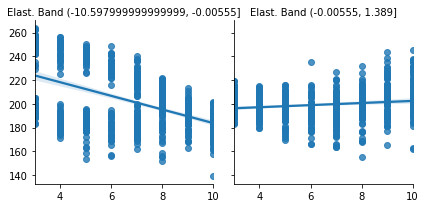

In [11]:
g = sns.FacetGrid(bands_df, col="sens_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Sens. Band {col_name}");

Comme nous pouvons le voir, il semble que ce schéma de partitionnement soit utile. Pour la première partition, il y a une grande sensibilité au prix. Les ventes diminuent beaucoup à mesure que les prix augmentent. Cependant, pour la deuxième partition, les ventes restent à peu près inchangées à mesure que le prix augmente. En fait, il semble même que les ventes augmentent à mesure que le prix augmente, mais cela est probablement du bruit.

Contrastons cela avec les partitions réalisées en utilisant le modèle de prédiction ML :

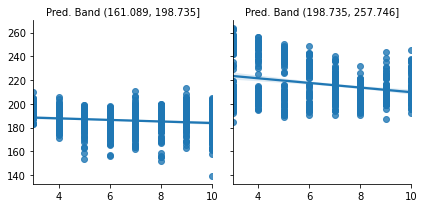

In [12]:
g = sns.FacetGrid(bands_df, col="pred_band")
g.map_dataframe(sns.regplot, x="price", y="sales")
g.set_titles(col_template="Pred. Band {col_name}");

J'aime beaucoup ce graphique car il transmet un point très important. Comme vous pouvez le voir, les partitions du modèle prédictif divisent les unités sur l'axe des y. Lors des jours comme ceux de la première partition, nous ne vendons pas beaucoup de glace, mais nous en vendons davantage les jours comme ceux de la deuxième partition. Je trouve cela fascinant car le modèle de prédiction fait exactement ce qu'il est censé faire : il prédit les ventes. Il peut distinguer entre les jours où les ventes de glace seront faibles et ceux où elles seront élevées.

Le seul problème est que cette prédiction n'est pas particulièrement utile ici. En fin de compte, nous voulons savoir quand nous pouvons augmenter les prix et quand nous ne le pouvons pas. Mais une fois que nous examinons les pentes des lignes dans les partitions du modèle prédictif, nous constatons qu'elles ne changent pas beaucoup. En d'autres termes, les deux partitions, telles que définies par le modèle de prédiction, ont une réactivité à l'augmentation des prix à peu près équivalente. Cela ne nous offre pas beaucoup d'informations sur les jours où nous pouvons augmenter les prix, car il semble que le prix n'affecte pas du tout les ventes.

## Idées Clés

Nous avons finalement formalisé le concept de l'Effet de Traitement Moyen Conditionnel (CATE) et comment il peut être utile pour la personnalisation. En d'autres termes, si nous pouvons comprendre comment chaque unité réagit à un traitement, c'est-à-dire si nous pouvons comprendre l'hétérogénéité de l'effet du traitement, nous pouvons offrir le meilleur traitement en fonction des caractéristiques individuelles de l'unité.

Nous avons également confronté cet objectif à celui d'un modèle prédictif. En effet, nous avons reconsidéré la tâche d'estimation, en passant de la prédiction de $Y$ dans son format brut à la prédiction de la manière dont $Y$ change avec $T$, $\frac{\delta y}{\delta t}$.

Malheureusement, il n'est pas du tout évident de construire des modèles pour cela. Étant donné que nous ne pouvons pas observer directement la sensibilité, il est difficile de créer un modèle qui la prédit. Mais la régression linéaire est venue à notre secours. En utilisant un modèle de régression ajusté pour prédire $Y$, nous avons trouvé un moyen de prédire également $\frac{\delta y}{\delta t}$. Nous avons également dû inclure des termes d'interaction entre le traitement et les caractéristiques. Cela a permis que notre prédiction de sensibilité soit différente pour chaque client. En d'autres termes, nous estimions maintenant $E[Y'(t) | X]$. Ces prédictions de sensibilité ont ensuite été utilisées pour regrouper nos unités en fonction de leur sensibilité au traitement, nous aidant ainsi à décider du niveau de traitement pour chaque groupe.

![img](./data/img/causal-model/economists.png)

Une question naturelle qui se pose est de savoir si nous pouvons remplacer la régression linéaire par un modèle de machine learning générique et utiliser celui-ci pour prédire la sensibilité. La réponse est oui, mais il y a quelques réserves. Ce chapitre a utilisé un modèle CATE très simple car je pense qu'il est plus facile de comprendre le concept sous-jacent avec une régression linéaire. Ne vous inquiétez pas, nous verrons des modèles plus sophistiqués dans les chapitres à venir. Mais avant cela, je dois d'abord aborder un sujet très important, à savoir comment comparer deux modèles CATE et décider lequel est le meilleur.
 
## Références

Les choses que j'ai écrites ici viennent principalement de ma propre expérience. Je les ai apprises par la pratique. Cela signifie qu'il n'y a pas de référence directe à laquelle je peux vous renvoyer. Cela signifie aussi que ce que j'ai écrit ici n'a **pas** été soumis à l'examen académique que la bonne science traverse souvent. Au lieu de cela, remarquez comment je parle de choses qui fonctionnent dans la pratique, mais je ne passe pas trop de temps à expliquer pourquoi cela est le cas. C'est une sorte de science de la rue, si vous voulez. Cependant, je mets cela à la disposition du public pour examen, donc, si vous trouvez quelque chose d'absurde, ouvrez un problème et je le traiterai au mieux de mes efforts.

## Contribuer

*L'Inférence Causale pour les Courageux et les Vrais* est un matériel open-source sur l'inférence causale, la statistique de la science. Son objectif est d'être accessible monétairement et intellectuellement. Il utilise uniquement des logiciels gratuits basés sur Python.
Si vous avez trouvé ce livre précieux et souhaitez le soutenir, veuillez vous rendre sur [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). Si vous n'êtes pas prêt à contribuer financièrement, vous pouvez également aider en corrigeant les fautes de frappe, en suggérant des modifications ou en donnant votre avis sur les passages que vous n'avez pas compris. Rendez-vous sur le repo du livre et [ouvrez une issue](https://github.com/matheusfacure/python-causality-handbook/issues). Enfin, si vous avez aimé ce contenu, veuillez le partager avec d'autres personnes qui pourraient le trouver utile et lui donner une [étoile sur GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).